In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = "Latin Modern Roman"
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = "\\usepackage{mathtools}, \\usepackage{siunitx}"

def add_num_format(x):
    return '\\num{'+ str(x) + '}'

def write_latex(self, target):
    return Path(target).write_text(self.to_latex(escape=False, float_format=add_num_format))

pd.DataFrame.write_latex = write_latex

In [2]:
"""
from bigfloat import *

J = 1.0
def Z(B,N):
    return 2**(N-1)*(cosh(J*B)**N+sinh(J*B)**N)

def f(B,N):
    return -log(Z(B,N)) / (N*B)
def binom(n,k):
    return factorial(n) / (factorial(k)*factorial(n-k))

def Z2(B,N):
    return sum(binom(N,2*l)*exp((N-4*l)*J*B) for l in range(N//2))
"""; print()

In [3]:
from gmpy2 import *

J = 1.0
def Z(B,N):
    return 2**(N-1)*(cosh(J*B)**N+sinh(J*B)**N)

def f(B,N):
    return -log(Z(B,N)) / (N*B)

def Z2(B,N):
    return sum(bincoef(N,2*l)*exp((N-4*l)*J*B) for l in range(N//2))

In [4]:
%timeit Z(100,100)

20.6 µs ± 396 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%timeit Z2(10,100)

305 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
mpfr_vect = sp.vectorize(mpfr)
f_vect = sp.vectorize(f)
Z_vect = sp.vectorize(Z)

In [7]:
tN = [2,10,1000]
tT = mpfr_vect(sp.linspace(0, 10000, 10000, dtype=object))

data = pd.DataFrame()
data['B'] = 1/tT
data['T'] = tT
for N in tN:
    data['f_{}'.format(N)] = f_vect(data.B, N)
#data.write_latex('data/table1.tex')

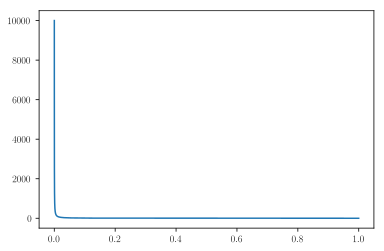

In [8]:
plt.plot(data['B'],data["T"])

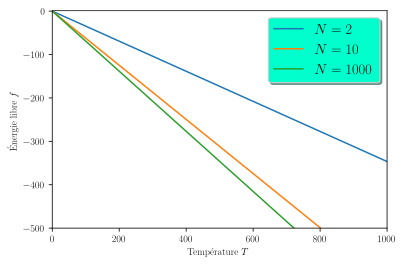

In [9]:
fig, ax = plt.subplots()
for N in tN:
    ax.plot(data["T"], data['f_{}'.format(N)], label="$N={}$".format(N))

ax.set_xlabel("Temp\\'erature $T$")
ax.set_ylabel("\\'Energie libre $f$")
ax.set_xlim(0,1000)
ax.set_ylim(-500,1)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig('Elibre.pdf')

In [10]:
1/(sp.log(1 + sp.sqrt(2))/2)

2.269185314213022